In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\BEST BUY\Desktop\adult.csv", na_values =["??", "###", "?"])
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
print(data['income'].value_counts())
#print number of people who have how much income.

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [4]:
data['income'] = [0 if x== '<=50K' else 1 for x in data['income']]
#assign easy countable variables 

In [5]:
x = data.drop('income', 1)
#x as dataframe of features of all input variables
#jisko predict karna hai usko change karke drop kar dete hai

y = data.income
#y as dataframe of output

In [6]:
#get_dummies in pandas
# oneHotEncoder in sci-kit learn
# education is a column in original data but here it is represented as a table

pd.get_dummies(x['education']).head()
#get_dummies splits a column based on its categories=> education is split into 4 categories.

#on -off => ie. how many times a value has been filled by that entry
#determine which value among all the other alternatives has been chosen

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
pd.get_dummies(x['workclass']).head()

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0


In [8]:
# decide while categorical value you want to use => convert ordinal to categorical 
#because model can process only one type of data at a time

for col_name in x.columns:
    # find datatype of each column
    #if x.col is ordinal => put in  unique category => calculate length of col name
    if x[col_name].dtypes == 'object':
        unique_cat = len(x[col_name].unique())
        print("Feature' {col_name}' has '{unique_cat}''unique categories".format(col_name = col_name, unique_cat = unique_cat))
        
        
#output => means that each columns has n number of unique ordinal values that are now converted to categorical

Feature' workclass' has '9''unique categories
Feature' education' has '16''unique categories
Feature' marital-status' has '7''unique categories
Feature' occupation' has '15''unique categories
Feature' relationship' has '6''unique categories
Feature' race' has '5''unique categories
Feature' gender' has '2''unique categories
Feature' native-country' has '42''unique categories


In [9]:
pd.get_dummies(x['native-country']).head()

#get_dummies for native-country
#.head for whole data=> if pd.get_dummies(x['native-country'].head()) then head of only the first value 
#ie . the first 5 values of first country

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
#although native-country has a lot of unique values, sort the most common values and print top 5

print(x['native-country'].value_counts().sort_values(ascending = False).head())
#descending order (top 5)

United-States    43832
Mexico             951
Philippines        295
Germany            206
Puerto-Rico        184
Name: native-country, dtype: int64


In [11]:
x['native-country'] = ['United-States' if a == 'United-States' else 'Other' for a in x['native-country']]

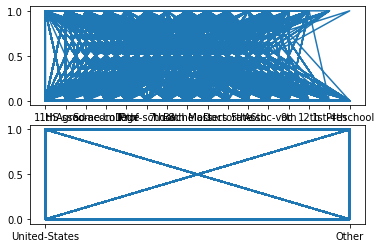

In [12]:
plt.figure()
plt.subplot(2,1,1)  # row , column , panel
plt.plot(x['education'],y);

plt.subplot(2,1,2)
plt.plot(x['native-country'],y);





In [13]:
data = data.drop('fnlwgt',axis=1)

In [14]:
data.dtypes

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [15]:
data = data.drop_duplicates()

In [16]:
data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income
count,42468.000000,42468.000000,42468.000000,42468.000000,42468.000000,42468.000000
mean,39.476947,10.094801,1226.217128,99.859212,40.650702,0.246021
std,13.779595,2.658658,7931.500736,429.072095,12.867960,0.430696
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,29.000000,9.000000,0.000000,0.000000,38.000000,0.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,49.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [17]:
data.isnull().sum()

age                   0
workclass          2411
education             0
educational-num       0
marital-status        0
occupation         2421
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      853
income                0
dtype: int64

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age', b='workclass',hue = 'income',data=data)
plt.title("Income based on age and Workclass",y = 1.015,fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("workclass", labelpad=13)
ax = plt.gca()


ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

<Figure size 720x576 with 0 Axes>

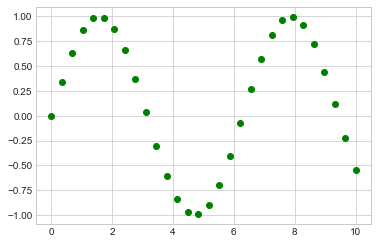

In [19]:
plt.style.use('seaborn-whitegrid')
x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y,'o', color = "green");

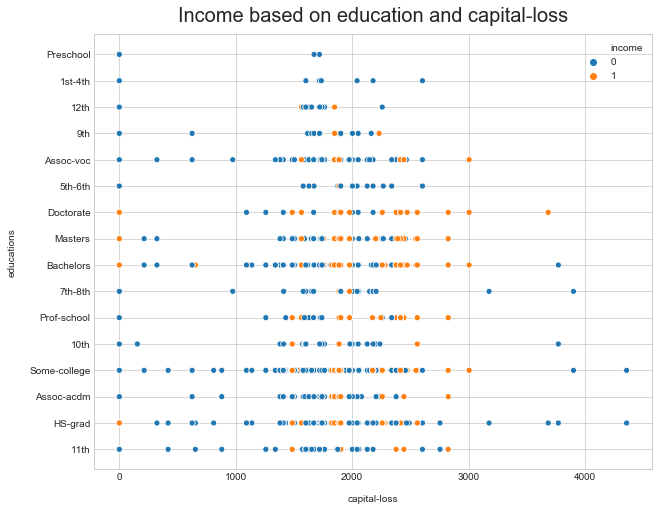

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='capital-loss', y='education',hue='income',data=data)
plt.title("Income based on education and capital-loss",y=1.015,fontsize=20)
plt.xlabel('capital-loss',labelpad=13)
plt.ylabel('educations',labelpad=13)
ax = plt.gca()

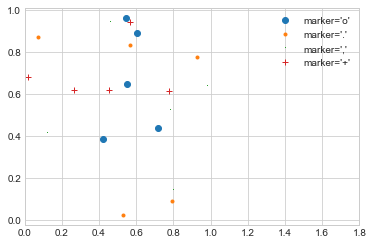

In [21]:
rng = np.random.RandomState(0)
for marker in ['o','.',',','+']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
plt.legend(numpoints=1)  #type of plot
plt.xlim(0,1.8);


In [98]:
#get_dummies in pandas
# oneHotEncoder in sci-kit learn
# education is a column in original data but here it is represented as a table

pd.get_dummies(x['workclass']).head()
#get_dummies splits a column based on its categories=> education is split into 4 categories.

#on -off => ie. how many times a value has been filled by that entry
#determine which value among all the other alternatives has been chosen

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0


In [102]:
#although native-country has a lot of unique values, sort the most common values and print top 5

print(x['workclass'].value_counts().sort_values(ascending = False).head())
#descending order (top 5)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Name: workclass, dtype: int64
